In [1]:
#Import the packages to be used

import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

#Make plot appear inline in rthe notebook
%matplotlib inline

In [2]:
#Load data previously prepared in data preparation step. Ensure expected columns present and both numerical & categorical feautures are present.

auto_prices = pd.read_csv('Auto_Data_Preped-SS.csv')
auto_prices.columns

Index(['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'log_price'],
      dtype='object')

In [3]:
auto_prices.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,log_price
0,3,alfa-romero,gas,std,two,hardtop_convert,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,9.510075
1,3,alfa-romero,gas,std,two,hardtop_convert,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,9.711116
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,9.711116
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.543235
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,9.767095


In [4]:
##Prepare Model Matrix
 # Convert categorical features into dummy variables w/ sklearn.preprocessing called "One Hot Encoding"
  #Categories encoded as numbers & start w/ 0  (4 categorical values = 0,1,2,3)
    
print(auto_prices['body_style'].unique())
Features = auto_prices['body_style']
enc = preprocessing.LabelEncoder()  #encoder object created
enc.fit(Features)  #Encoder is fit to unique string of values of feature
Features = enc.transform(Features)  #Applies numeric coding to original feature
print(Features)

['hardtop_convert' 'hatchback' 'sedan' 'wagon']
[0 0 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 2 2 2 3 1 1 1 1 1 1 2 3 1
 1 2 2 2 2 2 1 2 2 2 1 1 1 2 2 1 2 1 2 2 1 2 2 2 3 0 2 2 0 2 0 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 3 2 1 2 3 0 1 2 2 3 2 1 1 1 2 2 3 3 2 2 3 3 2 2 2
 1 1 1 2 2 3 1 1 0 0 0 1 2 1 2 1 2 1 1 1 2 2 2 2 2 3 3 3 3 1 1 1 3 3 3 2 1
 2 1 2 1 2 2 1 2 1 0 0 1 0 1 0 2 2 1 2 1 1 1 2 3 2 2 2 2 2 2 2 0 1 2 2 3 2
 3 2 3 2 3 2 2 2 2 2]


In [5]:
#Convert numerically coded categorical variable to dummy variables (4 rows w/ 0 or 1 to represent the category)

ohe = preprocessing.OneHotEncoder()  #Object is created
encoded = ohe.fit(Features.reshape(-1,1))  #Encoder is fit to numerically coded categortical value
Features = encoded.transform(Features.reshape(-1,1)).toarray()  #dummy variables are encoded
Features[:10,:]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [6]:
#Above- Have to perform this to all the rest of the categorical variables using a for loop
 #Then append them as columns to model matrix w/ scaled numerical variables

def encode_string(cat_feature):
    enc = preprocessing.LabelEncoder()  #First convert strings to numeric categories
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ohe = preprocessing.OneHotEncoder()  #Apply One Hot Encoding
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()

categorical_columns = ['fuel_type', 'aspiration', 'drive_wheels', 'num_of_cylinders']

for col in categorical_columns:
    temp = encode_string(auto_prices[col])
    Features = np.concatenate([Features, temp], axis = 1)
    
print(Features.shape)
print(Features[:2, :])

(195, 14)
[[1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]]


In [7]:
#5 categorical variables were converted into 14 dummy variables. 
 #How many dummy variables came from num_of_cylinders? -3-
print(auto_prices['num_of_cylinders'].unique())

['three_four' 'five_six' 'eight_twelve']


In [8]:
#Add numeric features to model matrix by concatenation

Features = np.concatenate([Features, np.array(auto_prices[['curb_weight', 'horsepower', 'city_mpg']])], axis =1)
Features[:2, :]

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.548e+03, 1.110e+02, 2.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.548e+03, 1.110e+02, 2.100e+01]])

In [9]:
#Create randomly sampled training & test data (Bernoulli sample) sets from sklearn.model_selection

nr.seed(9988)  #set seed
labels = np.array(auto_prices['log_price'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 40)
x_train = Features[indx[0], :]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1], :]
y_test = np.ravel(labels[indx[1]])

In [11]:
# Need to rescale the numeric features so they don't carry a larger influence on 
 #the model using scikit learn to Zscore numeric features first on training then test data set

scaler = preprocessing.StandardScaler().fit(x_train[:, 14:])
x_train[:, 14:] = scaler.transform(x_train[:, 14:])
x_test[:, 14:] = scaler.transform(x_test[:, 14:])
x_train[:5, :]

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        , -0.5384069 ,
        -1.26225437,  1.33602998],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.96837381,
         1.51064566, -1.00126852],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        , -0.86156658,
        -0.88897936,  0.71275038],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        , -0.27559631,
        -0.51570436

In [12]:
# Make the linear regression model using sklearn import linear_model

lin_mod = linear_model.LinearRegression(fit_intercept = False)  #intercept will be accomidated in coefficients of dummy variables
lin_mod.fit(x_train, y_train)  #fit the model w/ numpy array of features & label

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [14]:
#Examine intercept and coefficients of training data

print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 1.36372345  1.15436725  1.27397827  1.16791069  2.57778903  2.38219063
  2.48184692  2.47813274  1.62299441  1.62646566  1.71051959  1.70397511
  1.71596353  1.54004103  0.18009827  0.14148126 -0.07296916]


In [17]:
#Above- Intercept is 0.0. Dummy variables are in similiar range, indicating bias/intercept has been
 # incorporated in them. Numerical values increase for first 2 variables but weakly decrease for third.
    
#Below- Evaluate performance of model using test data set by computing performance metrics

def print_metrics(y_true, y_predicted, n_parameters):
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters -1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
y_score = lin_mod.predict(x_test)
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.022616207744398476
Root Mean Square Error = 0.15038686027841155
Mean Absolute Error    = 0.1191267843679618
Median Absolute Error  = 0.10696449432930777
R^2                    = 0.921638632102606
Adjusted R^2           = 0.7453255543334695


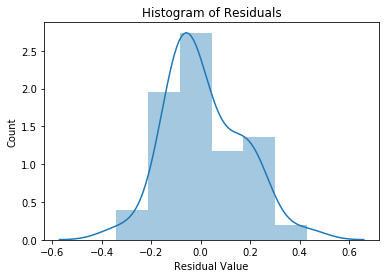

In [18]:
#Above- RMSE, MAE, Median absolute error are small & in similiar range. 
 # R^2 & R^2adj are different, indicating model may overfit & might not generalize well.
    
def hist_resids(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))  #compute vector of residuals
    sns.distplot(resids)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Count')
    
hist_resids(y_test, y_score)

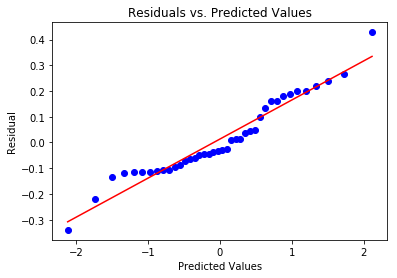

In [19]:
#Above- Residuals are small in range, but noticable skew in distribution

#Below- Examine Q-Q normal plot

def resid_qq(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))  #compute vector of residuals
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)

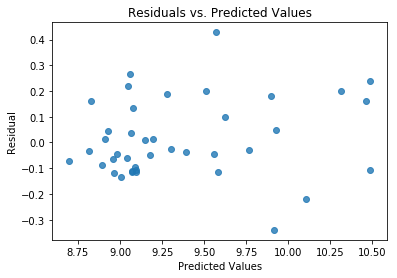

In [20]:
#Above- close to normally distributed with large residuals deviating from line (skew)

#Below- Display plot of residuals vs. predicted values

def resid_plot(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))   #comput vector of residuals
    sns.regplot(y_score, resids, fit_reg = False)
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual')
    
resid_plot(y_test, y_score)

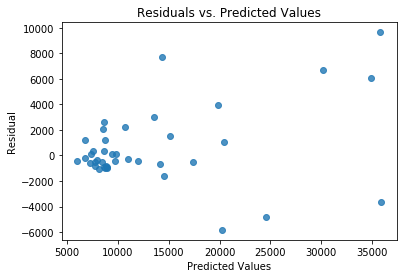

In [21]:
#Above- Fairly constant dispersion w/ noticable positive large residual

#Below- Above plot is for log of prices, need to convert back to normal prices.

y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform)

In [ ]:
# Untransformed prices shaped more like cone dispersion w/ increasing to the right.
 # Regression model does good job of predicting low cost autos, but gets progressively worse as price increases.
 # This model needs more improvement.
    
##Summary
 # Completed the process of constructing & evaluating a multiple linear regression model
    # 1) Transformed label value to make more symmetric and closer to Normal distribution
    # 2) Aggregated categories of categorical variables to improve statistical representation
    # 3) Scaled numerical features to prevent larger influence
    # 4) Recoded categorical feature as binary dummy variables using One Hot Encoder
    # 5) Fit linear regression model using Scikit-Learn
    # 6) Evaluated performance of model using both numeric & graphical methods
    